Importing the all requried Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Data Collection

Loading the csv file from pandas dataframe

In [2]:
import io
%cd "C:\Users\91866\Desktop\github_dataset\Titanic_Disaster"

C:\Users\91866\Desktop\github_dataset\Titanic_Disaster


In [3]:
train_data=pd.read_csv("train.csv")

In [4]:
test_data=pd.read_csv("test.csv")

In [5]:
# Printing the first five rows of dataset
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Printing the last five rows of Dataset
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
# Read the rows and columns
train_data.shape


(891, 12)

In [8]:
# Extracting information of Datasets
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB




      Exploratory Data Analysis



In [10]:
# Checking the number missing value of each columns 
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot: >

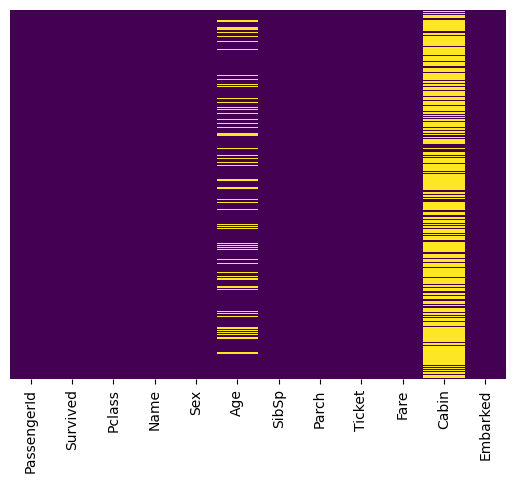

In [11]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')


Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"



Missing value Treatment

In [12]:
# Handling the missing value 
# Cabin column has more than 75% of missing value so we can drop it or 
# we can impute words with "missing" or "NotAvailable"

In [13]:
# drop the Cabin column from the datasets
train_data=train_data.drop(columns="Cabin",axis=1)


In [14]:
# Replacing the missing values in "Age" Columns with mean value(numarical values)
# inplace =True   changes will deflects in orignal datasets.
train_data["Age"].fillna(train_data["Age"].mean(),inplace=True)

In [15]:
# Embarked column is categorical value so we have to replace missing value with mode(idxmax)
train_data["Embarked"].fillna(train_data["Embarked"].value_counts().idxmax(),inplace=True)

In [16]:
# knowing the statistical measures
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
train_data.isnull().sum()
# We have completed missing value imputation.

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [18]:
# finding the number of people survived or not survived
train_data["Survived"].value_counts()
# from below result we can said that 
# (0 represent ) not survived people which are more than survived people

0    549
1    342
Name: Survived, dtype: int64

Data Visualization

<AxesSubplot: xlabel='Survived', ylabel='count'>

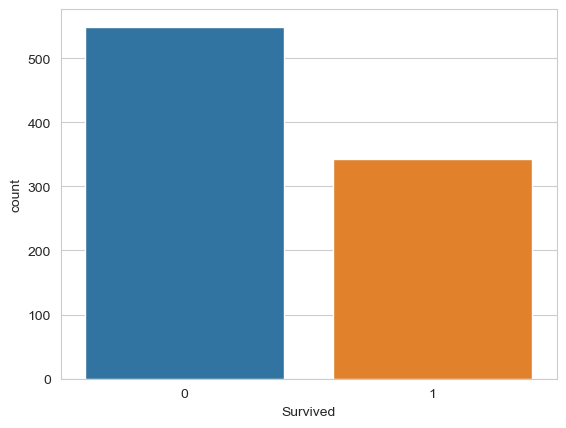

In [19]:
# Making Count plot survived column
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train_data)

<AxesSubplot: xlabel='Survived', ylabel='count'>

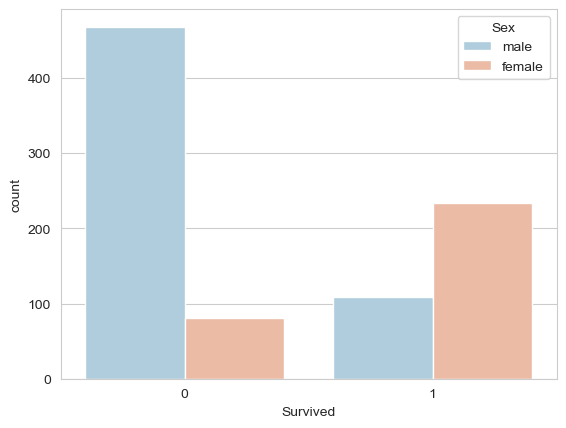

In [20]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train_data,palette='RdBu_r')

<AxesSubplot: xlabel='Survived', ylabel='count'>

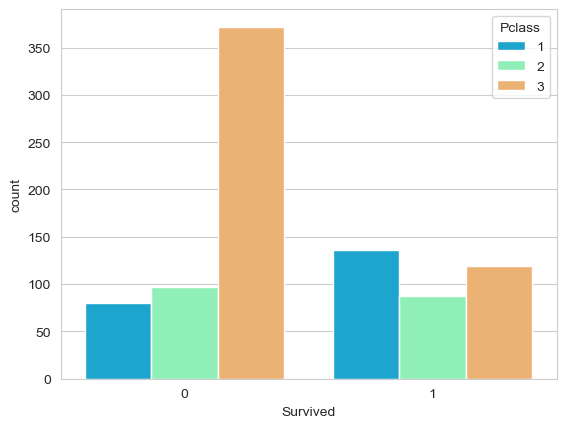

In [21]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train_data,palette='rainbow')

<AxesSubplot: xlabel='Age'>

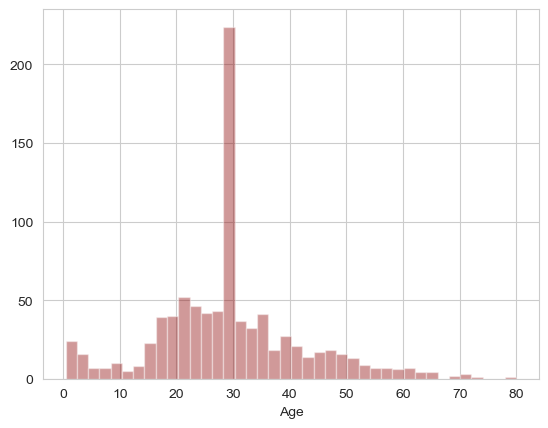

In [22]:
sns.distplot(train_data['Age'].dropna(),kde=False,color='darkred',bins=40)


<AxesSubplot: >

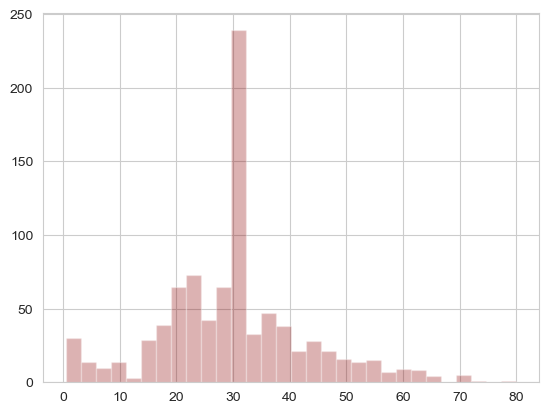

In [23]:
train_data['Age'].hist(bins=30,color='darkred',alpha=0.3)

<AxesSubplot: xlabel='SibSp', ylabel='count'>

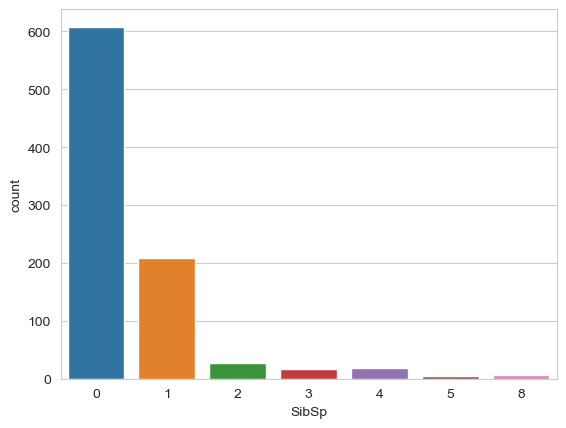

In [24]:
sns.countplot(x='SibSp',data=train_data)


<AxesSubplot: >

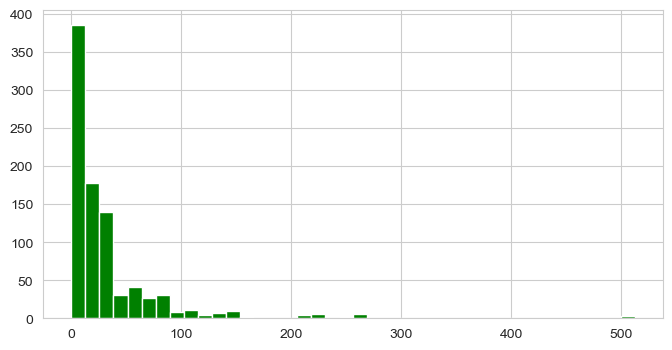

In [25]:
train_data['Fare'].hist(color='green',bins=40,figsize=(8,4))


<AxesSubplot: xlabel='Pclass', ylabel='Age'>

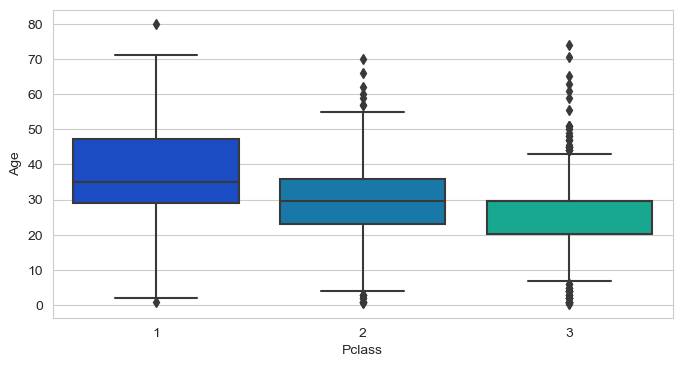

In [26]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Pclass',y='Age',data=train_data,palette='winter')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense.

In [27]:
train_data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [28]:
train_data.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [29]:
train_data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [30]:
from scipy import stats
from scipy.stats import f_oneway

In [31]:
# ANOVA TEST for - Gender
f_stats, p_value = stats.f_oneway(train_data[train_data['Sex'] == 'female']['Age'],
                                  train_data[train_data['Sex'] == 'male']['Age'])

print("--ANOVA hypothesis test--")
print("\n")
print("F_statistics:", f_stats)
print("P-value:", p_value)

if p_value < 0.05:
    print(f"p-value={p_value:.3f}, Null hypothesis is rejected")
else:
    print(f"p-value={p_value:.3f} failed to reject null hypothesis.")

--ANOVA hypothesis test--


F_statistics: 6.340624405901912
P-value: 0.01197498300682106
p-value=0.012, Null hypothesis is rejected


In [32]:
# ANOVA TEST for - Gender
f_stats, p_value = stats.f_oneway(train_data[train_data['Embarked'] =='S']['Age'],
                                  train_data[train_data['Embarked'] =='C']['Age'],
                                   train_data[train_data['Embarked'] =='Q']['Age'])

print("--ANOVA hypothesis test--")
print("\n")
print("F_statistics:", f_stats)
print("P-value:", p_value)

if p_value < 0.05:
    print(f"p-value={p_value:.3f}, Null hypothesis is rejected")
else:
    print(f"p-value={p_value:.3f} failed to reject null hypothesis.")

--ANOVA hypothesis test--


F_statistics: 0.49355314720610666
P-value: 0.6106208625564047
p-value=0.611 failed to reject null hypothesis.


In [33]:
from scipy.stats import chi2_contingency

In [34]:
chi2_stat, p_value, dof, ex = stats.chi2_contingency(pd.crosstab(train_data.Survived,train_data.Sex))
print("--chi2_contingency hypothesis test--")
print("\n")
print("Chi2 Stat :",chi2_stat)
print("Degrees of Freedom :",dof)
print("P-Value :",p_value)
print("Contingency Table :",ex)

if p_value < 0.05:
    print(f"p-value={p_value:.3f}, Null hypothesis is rejected")
else:
    print(f"p-value={p_value:.3f} failed to reject null hypothesis.")

--chi2_contingency hypothesis test--


Chi2 Stat : 260.71702016732104
Degrees of Freedom : 1
P-Value : 1.1973570627755645e-58
Contingency Table : [[193.47474747 355.52525253]
 [120.52525253 221.47474747]]
p-value=0.000, Null hypothesis is rejected


In [35]:

chi2_stat, p_value, dof, ex = stats.chi2_contingency(pd.crosstab(train_data.Survived,train_data.Embarked))
print("--chi2_contingency hypothesis test--")
print("\n")
print("Chi2 Stat :",chi2_stat)
print("Degrees of Freedom :",dof)
print("P-Value :",p_value)
print("Contingency Table :",ex)

if p_value < 0.05:
    print(f"p-value={p_value:.3f}, Null hypothesis is rejected")
else:
    print(f"p-value={p_value:.3f} failed to reject null hypothesis.")

--chi2_contingency hypothesis test--


Chi2 Stat : 25.964452881874784
Degrees of Freedom : 2
P-Value : 2.3008626481449577e-06
Contingency Table : [[103.51515152  47.44444444 398.04040404]
 [ 64.48484848  29.55555556 247.95959596]]
p-value=0.000, Null hypothesis is rejected


Encoding the Categorical column

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [36]:
# converting categorical column 
train_data.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [37]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [38]:
#seperating Features and target
X=train_data.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1)
y=train_data['Survived']

In [39]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [40]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


Model Training

Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
logit=LogisticRegression()

In [43]:
logitmodel=logit.fit(X,y)

In [44]:
logitmodel.score(X,y)

0.8047138047138047

In [45]:
logitpredict=logitmodel.predict(X)

In [46]:
pd.crosstab(y,logitpredict)
#confusion matrix

col_0,0,1
Survived,,
0,475,74
1,100,242


In [47]:
from sklearn.metrics import accuracy_score

In [48]:
accuracy=accuracy_score(y,logitpredict)
accuracy

0.8047138047138047

We can check precision,recall,f1-score using classification report!

In [49]:
from sklearn.metrics import classification_report

In [50]:
print(classification_report(y,logitpredict))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       549
           1       0.77      0.71      0.74       342

    accuracy                           0.80       891
   macro avg       0.80      0.79      0.79       891
weighted avg       0.80      0.80      0.80       891



In [51]:
from sklearn.metrics import plot_roc_curve

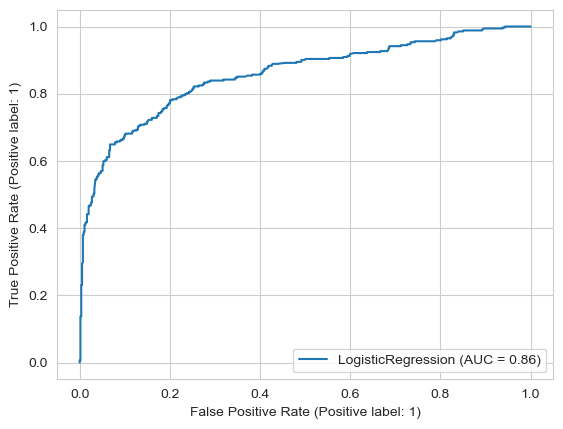

In [52]:
plot_roc_curve(logit,X,y)